# Chapter 1. Descriptive Statistics

Make necessary imports

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import display, Markdown


df = pd.read_csv("../data/train.csv")

print(f'dimension: {df.shape}')

df.head()

dimension: (8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [13]:
col_numeric = df.select_dtypes(exclude=['object']).columns[:-1]
print(list(col_numeric))

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [31]:
def target_group_stat(*, df: pd.DataFrame, columns: list, target: str) -> pd.DataFrame:
    dfg = df.groupby(target)[[*columns]].describe()
    
    for target_val in dfg.index:
        strings = [
            f'### {target} == `{target_val}`',
            '|#|Column|Count|Average|Std|Max|Min|25%|50%|75%|',
            '|:|:-----|:----|:------|:--|:--|:--|:--|:--|:--|'
        ]

        idx = pd.IndexSlice
        for i, col in enumerate(columns):
            pat = '|{}' * 10 + '|'

            strings.append(pat.format(
                i, col, 
                dfg.loc[target_val, idx[col, 'count']],
                dfg.loc[target_val, idx[col, 'mean']],
                dfg.loc[target_val, idx[col, 'std']],
                dfg.loc[target_val, idx[col, 'max']],
                dfg.loc[target_val, idx[col, 'min']],
                dfg.loc[target_val, idx[col, '25%']],
                dfg.loc[target_val, idx[col, '50%']],
                dfg.loc[target_val, idx[col, '75%']],

            ))

        display(Markdown('\n'.join(strings)))

    return dfg

target_group_stat(df=df, columns=col_numeric, target='Transported');

### Transported == `False`
|#|Column|Count|Average|Std|Max|Min|25%|50%|75%|
|:|:-----|:----|:------|:--|:--|:--|:--|:--|:--|
|0|Age|4226.0|29.922858495030763|13.699262294908632|79.0|0.0|21.0|27.0|38.0|
|1|RoomService|4217.0|389.2660659236424|875.6381226235834|14327.0|0.0|0.0|1.0|473.0|
|2|FoodCourt|4231.0|382.61593004017965|1200.1156005081566|16856.0|0.0|0.0|0.0|179.0|
|3|ShoppingMall|4221.0|167.5662165363658|456.5281262241819|10705.0|0.0|0.0|0.0|95.0|
|4|Spa|4223.0|564.3826663509353|1551.3560474262881|22408.0|0.0|0.0|4.0|453.5|
|5|VRDeck|4225.0|543.6298224852071|1563.0883679387448|24133.0|0.0|0.0|1.0|388.0|

### Transported == `True`
|#|Column|Count|Average|Std|Max|Min|25%|50%|75%|
|:|:-----|:----|:------|:--|:--|:--|:--|:--|:--|
|0|Age|4288.0|27.74883395522388|15.151705395324264|78.0|0.0|18.0|26.0|37.0|
|1|RoomService|4295.0|63.09802095459837|274.8124972552911|3992.0|0.0|0.0|0.0|0.0|
|2|FoodCourt|4279.0|532.6919841084366|1931.3069953151212|29813.0|0.0|0.0|0.0|0.0|
|3|ShoppingMall|4264.0|179.82997185741087|722.0267142264702|23492.0|0.0|0.0|0.0|0.0|
|4|Spa|4287.0|61.675530674131096|262.6828708449857|4103.0|0.0|0.0|0.0|0.0|
|5|VRDeck|4280.0|69.1481308411215|291.65817055545006|5063.0|0.0|0.0|0.0|0.0|

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

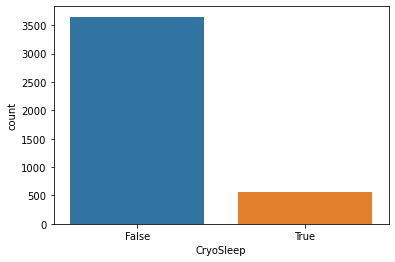

In [4]:
sns.countplot(x=df['CryoSleep'][df['Transported'] == False])

<AxesSubplot:xlabel='Destination', ylabel='count'>

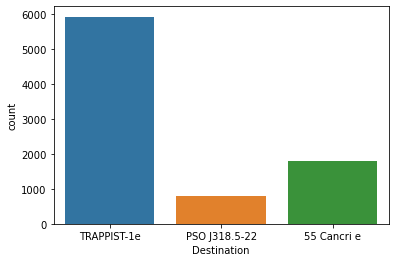

In [5]:
sns.countplot(x='Destination', data=df)

In [6]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

<AxesSubplot:xlabel='Destination', ylabel='count'>

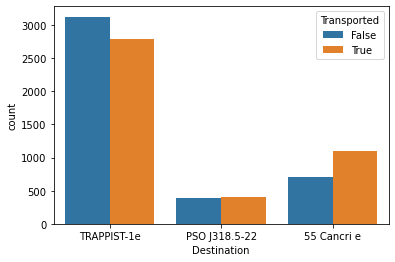

In [7]:
sns.countplot(hue='Transported', x='Destination', data=df)

In [8]:
df[['First Name', 'Last Name']] = df['Name'].str.split(expand=True)
df[['Group ID', 'count']] = df['PassengerId'].str.split('_', expand=True)

df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,First Name,Last Name,Group ID,count
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Maham,Ofracculy,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Juanna,Vines,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Altark,Susent,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Solam,Susent,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Willy,Santantines,0004,01


In [9]:
df_gid_lname_dup =  df[df.duplicated(subset=['Group ID', 'Last Name'], keep=False)]
df_gid_lname_dup[['Group ID', 'Last Name']]

,Group ID,Last Name
2,0003,Susent
3,0003,Susent
6,0006,Jacostaffey
7,0006,Jacostaffey
9,0008,Flatic
...,...,...
8685,9275,Conable
8686,9275,Conable
8687,9275,Conable
8691,9280,Hontichre


In [10]:
df_gid_lname_dup.groupby(['Group ID', 'Last Name'])[['Last Name']].count()

,,Last Name
Group ID,Last Name,
0003,Susent,2
0006,Jacostaffey,2
0008,Flatic,3
0017,Brighttt,2
0020,Brantuarez,3
...,...,...
9252,Stranbeate,2
9267,Opshaft,2
9272,Simson,2


In [11]:
df_gid_lname_dup[df_gid_lname_dup['Group ID'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,First Name,Last Name,Group ID,count


In [12]:
df_gid_lname_dup_cp = df_gid_lname_dup.copy()

df_gid_lname_dup_cp['Group ID'] = df_gid_lname_dup_cp['Group ID'].astype(int)

df_gid_lname_dup_cp['Group ID'].value_counts()

8728    8
8168    8
5885    8
8956    8
8988    8
       ..
3641    2
3654    2
3658    2
3662    2
9280    2
Name: Group ID, Length: 1307, dtype: int64

In [13]:
df_gid_lname_dup_cp['Group ID'].value_counts().describe()

count    1307.000000
mean        2.641928
std         1.133650
min         2.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: Group ID, dtype: float64

<AxesSubplot:xlabel='Group ID', ylabel='Count'>

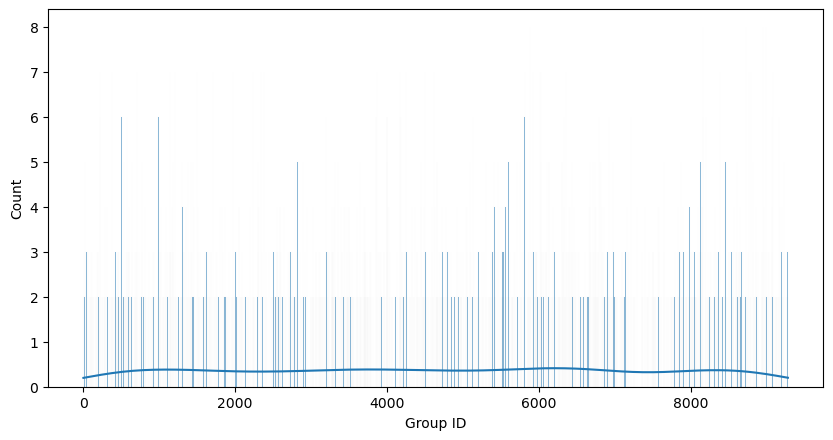

In [14]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.histplot(df_gid_lname_dup_cp['Group ID'], kde=True, discrete=True, ax=ax)

In [40]:
df_mem2 = df_gid_lname_dup_cp.groupby('Group ID').filter(lambda x: len(x) == 2)
df_mem2.drop([
            'HomePlanet', 
            'CryoSleep',	
            'Cabin',	
            'Destination',	
            'Age',	
            'VIP',	
            'RoomService',
            'FoodCourt',	
            'ShoppingMall',	
            'Spa',	
            'VRDeck',
            'Name'
        ], axis=1, inplace=True)


df_mem2

,PassengerId,Transported,First Name,Last Name,Group ID,count
2,0003_01,False,Altark,Susent,3,01
3,0003_02,False,Solam,Susent,3,02
6,0006_01,True,Billex,Jacostaffey,6,01
7,0006_02,True,Candra,Jacostaffey,6,02
19,0017_01,True,Lyde,Brighttt,17,01
...,...,...,...,...,...,...
8679,9267_02,True,Sabi,Opshaft,9267,02
8682,9272_01,True,Ireene,Simson,9272,01
8683,9272_02,False,Gordo,Simson,9272,02
8691,9280_01,False,Celeon,Hontichre,9280,01


In [28]:
df_mem2['count'] = df_mem2['count'].astype(int)
df_mem2.groupby('Group ID')['PassengerId'].count().describe()

count    841.0
mean       2.0
std        0.0
min        2.0
25%        2.0
50%        2.0
75%        2.0
max        2.0
Name: PassengerId, dtype: float64

In [36]:
def fill_group_membership(subframe):
    if len(subframe) < 2:
        subframe['n_members'] = '1'
    elif len(subframe) == 2:
        subframe['n_members'] = '2'
    else:
        subframe['n_members'] = '>2'
    return subframe

gb = df_gid_lname_dup_cp.groupby('Group ID')
dfg = gb.apply(fill_group_membership)
dfg

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,First Name,Last Name,Group ID,count,n_members
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Altark,Susent,3,01,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Solam,Susent,3,02,2
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,Billex,Jacostaffey,6,01,2
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,Candra,Jacostaffey,6,02,2
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,Erraiam,Flatic,8,01,>2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True,Polaton,Conable,9275,01,>2
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False,Diram,Conable,9275,02,>2
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True,Atlasym,Conable,9275,03,>2
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Celeon,Hontichre,9280,01,2


<AxesSubplot:xlabel='n_members', ylabel='count'>

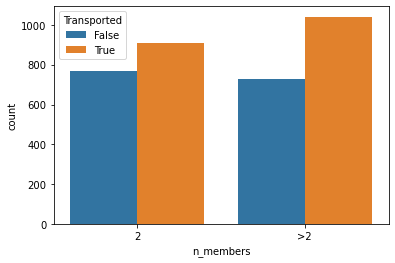

In [37]:
sns.countplot(x='n_members', hue='Transported', data=dfg)

In [38]:
dfg['n_members'].value_counts()

>2    1771
2     1682
Name: n_members, dtype: int64

## Remarks

1. No passenger travelled alone, either in groups of 2 or >2
2. Majority of them travelled in groups of 2


## Questions

1. How many of the passengers with the same last name have travelled under the same group?

In [51]:
df_gid_lname_dup.groupby(['Group ID', 'Last Name'])[['Last Name']].count()

,,Last Name
Group ID,Last Name,
0003,Susent,2
0006,Jacostaffey,2
0008,Flatic,3
0017,Brighttt,2
0020,Brantuarez,3
...,...,...
9252,Stranbeate,2
9267,Opshaft,2
9272,Simson,2
